In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

print("Package importing completed...")

Package importing completed...


In [56]:
# 2013 dataset https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# 2023 dataset https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

# Importing dataset
data = pd.read_csv("/content/creditcard.csv") # update path to dataset
print("Dataset importing completed...")

# Preview dataset
data.head()
print("---------")
print("| Shape |")
print("---------")
print(data.shape)

Dataset importing completed...
---------
| Shape |
---------
(284807, 31)


In [62]:
# Organize valid and invalid credit card transactions
valid_transactions = data[data['Class'] == 0]
fraud_transactions = data[data['Class'] == 1]
print("--------------------------------")
print("| Valid vs. Fraud Transactions |")
print("--------------------------------")
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))
print('Fraud Transactions: {}'.format(len(data[data['Class'] == 1])))

--------------------------------
| Valid vs. Fraud Transactions |
--------------------------------
Valid Transactions: 284315
Fraud Transactions: 492


In [53]:
# Statistics of valid transactions
print("---------------------------------")
print("| Statistics Valid Transactions |")
print("---------------------------------")
valid_transactions.Amount.describe()

---------------------------------
| Statistics Valid Transactions |
---------------------------------


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [54]:
# Statistics of fraud transactions
print("---------------------------------")
print("| Statistics Valid Transactions |")
print("---------------------------------")
fraud_transactions.Amount.describe()

---------------------------------
| Statistics Valid Transactions |
---------------------------------


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

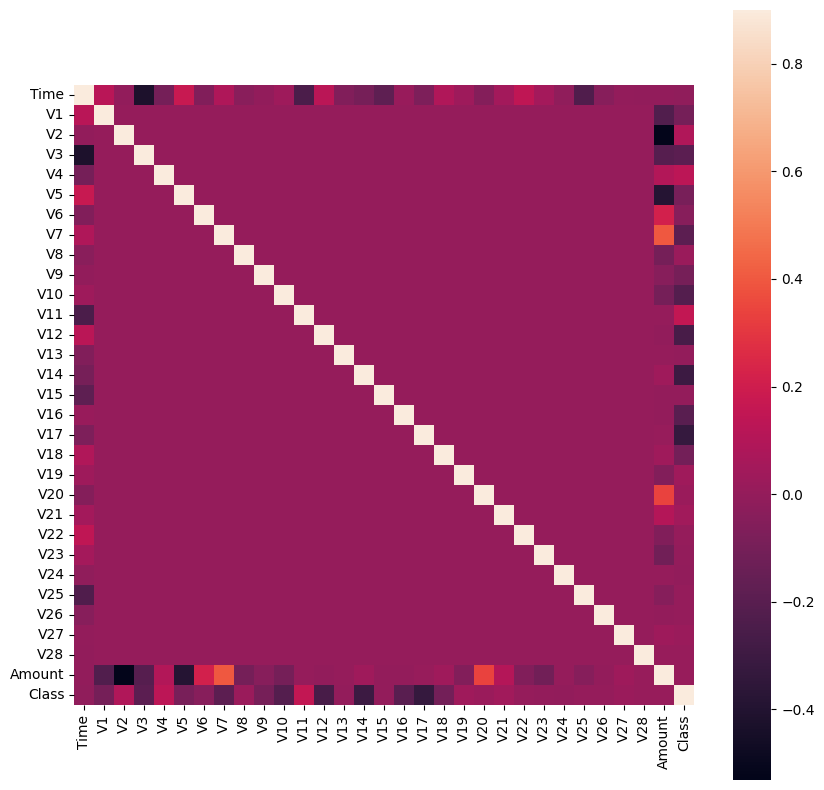

In [57]:
# Correlation matrix
correlation_matrix = data.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix, vmax = 0.9, square = True)
plt.show()

In [58]:
# Organizing dataset
X = data.drop(['Class'], axis = 1)
Y = data['Class']
xData = X.values
yData = Y.values

# Split data into training and validation set using 75% train and 25% test ratio
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.25, random_state = 3045)
print("Training and test dataset split completed...")

Training and test dataset split completed...


In [59]:
# Training model using Random Forest Classifier algorithm
model = RandomForestClassifier()
model.fit(xTrain, yTrain)
prediction = model.predict(xTest)
print("Model training completed...")

Model training completed...


In [60]:
# Model evaluation
print("-----------------")
print("| Model Results |")
print("-----------------")

# Accuracy Score
accuracy = accuracy_score(yTest, prediction)
print("Accuracy: ", accuracy)

# Precision Score
precision = precision_score(yTest, prediction)
print("Precision: ", precision)

# Recall Score
recall = recall_score(yTest, prediction)
print("Recall: ", recall)

# F1 Score
f1 = f1_score(yTest, prediction)
print("F1: ", f1)

-----------------
| Model Results |
-----------------
Accuracy:  0.9995646189713772
Precision:  0.95
Recall:  0.7851239669421488
F1:  0.8597285067873304


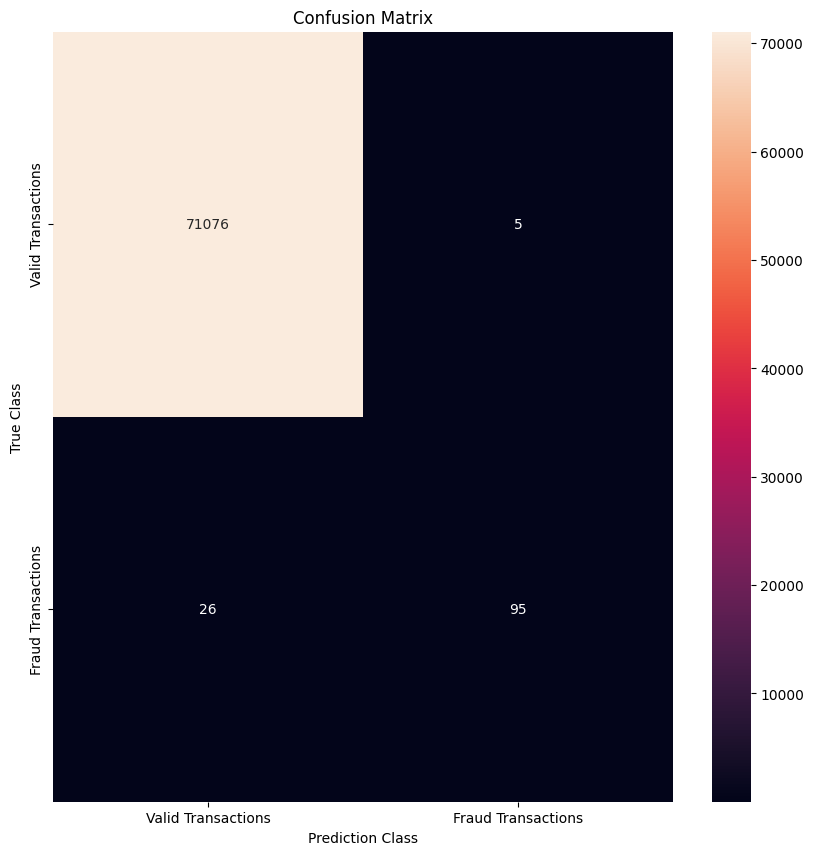

In [61]:
# Confusion Matrix
labels = ['Valid Transactions', 'Fraud Transactions']
cm = confusion_matrix(yTest, prediction)
plt.figure(figsize = (10,10))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt = "d");
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Prediction Class")
plt.show()